In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def show_signals(data):
    Accelerometer_X_axis_data = data[:, 0]
    Accelerometer_Y_axis_data = data[:, 1]
    Accelerometer_Z_axis_data = data[:, 2]
    Gyroscope_X_axis_data = data[:, 3]
    Gyroscope_Y_axis_data = data[:, 4]
    Gyroscope_Z_axis_data = data[:, 5]
    time = np.linspace(0.01, data.shape[0] / 100, data.shape[0])

    plt.figure(figsize=(20, 10), dpi=80)

    ax1 = plt.subplot(231)
    ax1.plot(time, Accelerometer_X_axis_data, "b")
    ax1.title.set_text("Accelerometer X axis")
    ax1.set_xlabel("time (s) ->")
    ax1.set_ylabel("Acceleration (m/s^2)")
    ax1.grid(True)

    ax2 = plt.subplot(232)
    ax2.plot(time, Accelerometer_Y_axis_data, "g")
    ax2.title.set_text("Accelerometer Y axis")
    ax2.set_xlabel("time (s) ->")
    ax2.set_ylabel("Acceleration (m/s^2)")
    ax2.grid(True)

    ax3 = plt.subplot(233)
    ax3.plot(time, Accelerometer_Z_axis_data, "r")
    ax3.title.set_text("Accelerometer Z axis")
    ax3.set_xlabel("time (s) ->")
    ax3.set_ylabel("Acceleration (m/s^2)")
    ax3.grid(True)

    ax4 = plt.subplot(234)
    ax4.plot(time, Gyroscope_X_axis_data, "b")
    ax4.title.set_text("Gyroscope X axis")
    ax4.set_xlabel("time (s) ->")
    ax4.set_ylabel("Angular rotation (rad/s)")
    ax4.grid(True)

    ax5 = plt.subplot(235)
    ax5.plot(time, Gyroscope_Y_axis_data, "g")
    ax5.title.set_text("Gyroscope Y axis")
    ax5.set_xlabel("time (s) ->")
    ax5.set_ylabel("Angular rotation (rad/s)")
    ax5.grid(True)

    ax6 = plt.subplot(236)
    ax6.plot(time, Gyroscope_Z_axis_data, "r")
    ax6.title.set_text("Gyroscope Z axis")
    ax6.set_xlabel("time (s) ->")
    ax6.set_ylabel("Angular rotation (rad/s)")
    ax6.grid(True)

    plt.show()

In [2]:
f = open("../datasets/data_augmentation_KU-HAR.txt", "r")
all_lines = f.readlines()

pairs = []

for line in all_lines:
    line = line.rstrip().split(" ")

    # store pairs
    pairs.append([line[0], line[-1]])

print(pairs, "\n")
print("Num. of samples: ", len(pairs))

[['Stand', 'Talk-stand'], ['Stand', 'Pick'], ['Stand', 'Jump'], ['Stand', 'Walk'], ['Stand', 'Walk-backward'], ['Stand', 'Walk-circle'], ['Stand', 'Run'], ['Stand', 'Stair-up'], ['Stand', 'Stair-down'], ['Stand', 'Table-tennis'], ['Sit', 'Talk-sit'], ['Talk-sit', 'Sit'], ['Talk-stand', 'Stand'], ['Talk-stand', 'Pick'], ['Talk-stand', 'Jump'], ['Talk-stand', 'Walk'], ['Talk-stand', 'Walk-backward'], ['Talk-stand', 'Walk-circle'], ['Talk-stand', 'Run'], ['Talk-stand', 'Stair-up'], ['Talk-stand', 'Stair-down'], ['Talk-stand', 'Table-tennis'], ['Lay', 'Sit-up'], ['Pick', 'Stand'], ['Pick', 'Talk-stand'], ['Pick', 'Jump'], ['Pick', 'Walk'], ['Pick', 'Walk-backward'], ['Pick', 'Walk-circle'], ['Pick', 'Run'], ['Pick', 'Stair-up'], ['Pick', 'Stair-down'], ['Pick', 'Table-tennis'], ['Jump', 'Stand'], ['Jump', 'Talk-stand'], ['Jump', 'Pick'], ['Jump', 'Walk'], ['Jump', 'Walk-backward'], ['Jump', 'Walk-circle'], ['Jump', 'Run'], ['Jump', 'Stair-up'], ['Jump', 'Stair-down'], ['Jump', 'Table-tenni

In [5]:
CLASS_LABELS = np.array(
    [
        "Stand",
        "Sit",
        "Talk-sit",
        "Talk-stand",
        "Stand-sit",
        "Lay",
        "Lay-stand",
        "Pick",
        "Jump",
        "Push-up",
        "Sit-up",
        "Walk",
        "Walk-backward",
        "Walk-circle",
        "Run",
        "Stair-up",
        "Stair-down",
        "Table-tennis",
    ]
)

df = pd.read_csv("../datasets/3.Time_domain_subsamples/KU-HAR_time_domain_subsamples_20750x300.csv", header=None)

signals = df.values[:, 0:1800]
signals = np.array(signals, dtype=np.float32)
labels = df.values[:, 1800]
labels = np.array(labels, dtype=np.int64)

print(signals.shape, labels.shape, "\n")
indexes = [
    6587,
    6588,
    6589,
    6590,
    6591,
    6592,
    6593,
    6594,
    6595,
    6596,
    6597,
    6598,
    6599,
    6600,
    6601,
    6602,
    6603,
    6604,
    6605,
    6606,
    6607,
    6660,
    6661,
    6662,
    6663,
    6664,
    6665,
    6666,
    6667,
    6668,
    6669,
    6670,
    6671,
    6672,
    6673,
    6674,
    6675,
    6676,
    6677,
    6678,
    6679,
    6680,
    6681,
    6682,
    6683,
    6684,
    6685,
    6686,
    6687,
    6716,
    6717,
    6718,
    6719,
    6720,
    6721,
    6722,
    6723,
    6724,
    6725,
    6726,
    6727,
    6728,
    6729,
    6730,
    6731,
    6732,
    6733,
    6734,
    6735,
    6736,
    6737,
    6738,
    6739,
    6740,
    6741,
    6742,
    6743,
    6750,
    6751,
    6752,
    6753,
    6754,
    6755,
    6756,
    6757,
    6758,
    6759,
    6760,
    6761,
    6762,
    6763,
    6764,
    6765,
    6766,
    6767,
]

# delete the bad samples
signals = np.delete(signals, indexes, 0)
labels = np.delete(labels, indexes, 0)

signals = np.stack(
    [
        signals[:, 0:300],  # ACC X
        signals[:, 300:600],  # ACC Y
        signals[:, 600:900],  # ACC Z
        signals[:, 900:1200],  # GYRO X
        signals[:, 1200:1500],  # GYRO Y
        signals[:, 1500:1800],  # GYRO Z
    ],
    axis=-1,
)
labels = np.repeat(labels.reshape(labels.shape[0], 1), signals.shape[1], axis=1)

print("Mean:", np.mean(signals, axis=(0, 1)))
print("Std:", np.std(signals, axis=(0, 1)))
print("Max:", np.max(signals, axis=(0, 1)))
print("Min:", np.min(signals, axis=(0, 1)), "\n")

print(signals.shape, labels.shape, "\n")

(20750, 1800) (20750,) 

Mean: [ 0.04835381 -0.04000019 -0.06103219  0.01185658  0.00415822  0.00092788]
Std: [3.6388602 2.1443195 2.8478932 1.309968  1.0470778 1.0666409]
Max: [194.52   91.779 340.59   97.376  79.272  78.783]
Min: [-172.74  -143.17  -315.89  -113.8    -85.757  -78.866] 

(20655, 300, 6) (20655, 300) 



In [6]:
new_signals = []
new_labels = []

for i in range(len(pairs)):
    print("Working on ", i, "sample")

    first = np.where(CLASS_LABELS == pairs[i][0])[0]
    second = np.where(CLASS_LABELS == pairs[i][1])[0]
    print(first)
    print(second, "\n")

    first_indexes = np.unique(np.where(labels == first)[0])
    second_indexes = np.unique(np.where(labels == second)[0])
    print(first_indexes.shape)
    print(second_indexes.shape, "\n")

    # minimum pre vytvorenie absolutne neduplicitnych prikladov - zabranenie overfit
    count = min(first_indexes.shape[0], second_indexes.shape[0])

    merged_signals = np.concatenate(
        (signals[first_indexes[:count]], signals[second_indexes[:count]]), axis=1
    )
    print(merged_signals.shape)

    merged_labels = np.concatenate(
        (labels[first_indexes[:count]], labels[second_indexes[:count]]), axis=1
    )
    print(merged_labels.shape, "\n")

    downsample_signals = merged_signals[:, ::2, :]
    print(downsample_signals.shape)
    new_signals.append(downsample_signals)

    downsample_labels = merged_labels[:, ::2]
    print(downsample_labels.shape, "\n")
    new_labels.append(downsample_labels)

# merge all pairs into batch axis
new_signals = np.concatenate(new_signals, axis=0)
new_labels = np.concatenate(new_labels, axis=0)

print(new_signals)
print(new_labels)
print(new_signals.shape, new_labels.shape)

Working on  0 sample
[0]
[3] 

(1886,)
(1866,) 

(1866, 600, 6)
(1866, 600) 

(1866, 300, 6)
(1866, 300) 

Working on  1 sample
[0]
[7] 

(1886,)
(1333,) 

(1333, 600, 6)
(1333, 600) 

(1333, 300, 6)
(1333, 300) 

Working on  2 sample
[0]
[8] 

(1886,)
(666,) 

(666, 600, 6)
(666, 600) 

(666, 300, 6)
(666, 300) 

Working on  3 sample
[0]
[11] 

(1886,)
(882,) 

(882, 600, 6)
(882, 600) 

(882, 300, 6)
(882, 300) 

Working on  4 sample
[0]
[12] 

(1886,)
(317,) 

(317, 600, 6)
(317, 600) 

(317, 300, 6)
(317, 300) 

Working on  5 sample
[0]
[13] 

(1886,)
(259,) 

(259, 600, 6)
(259, 600) 

(259, 300, 6)
(259, 300) 

Working on  6 sample
[0]
[14] 

(1886,)
(500,) 

(500, 600, 6)
(500, 600) 

(500, 300, 6)
(500, 300) 

Working on  7 sample
[0]
[15] 

(1886,)
(798,) 

(798, 600, 6)
(798, 600) 

(798, 300, 6)
(798, 300) 

Working on  8 sample
[0]
[16] 

(1886,)
(781,) 

(781, 600, 6)
(781, 600) 

(781, 300, 6)
(781, 300) 

Working on  9 sample
[0]
[17] 

(1886,)
(458,) 

(458, 600, 6)
(45

In [7]:
print(signals.shape, labels.shape)
print(new_signals.shape, new_labels.shape)

# merge all pairs into batch axis
final_signals = np.concatenate([signals, new_signals], axis=0)
final_labels = np.concatenate([labels, new_labels], axis=0)

print("Mean:", np.mean(final_signals, axis=(0, 1)))
print("Std:", np.std(final_signals, axis=(0, 1)))
print("Max:", np.max(final_signals, axis=(0, 1)))
print("Min:", np.min(final_signals, axis=(0, 1)), "\n")

print(final_signals.shape, final_labels.shape)

(20655, 300, 6) (20655, 300)
(62474, 300, 6) (62474, 300)
Mean: [ 0.10943159 -0.07794212 -0.0883355   0.0306053   0.00974582  0.00629569]
Std: [5.192652  3.0467124 3.9461544 1.697749  1.36974   1.4093003]
Max: [194.52   91.779 340.59   97.376  79.272  78.783]
Min: [-172.74  -143.17  -315.89  -113.8    -85.757  -78.866] 

(83129, 300, 6) (83129, 300)


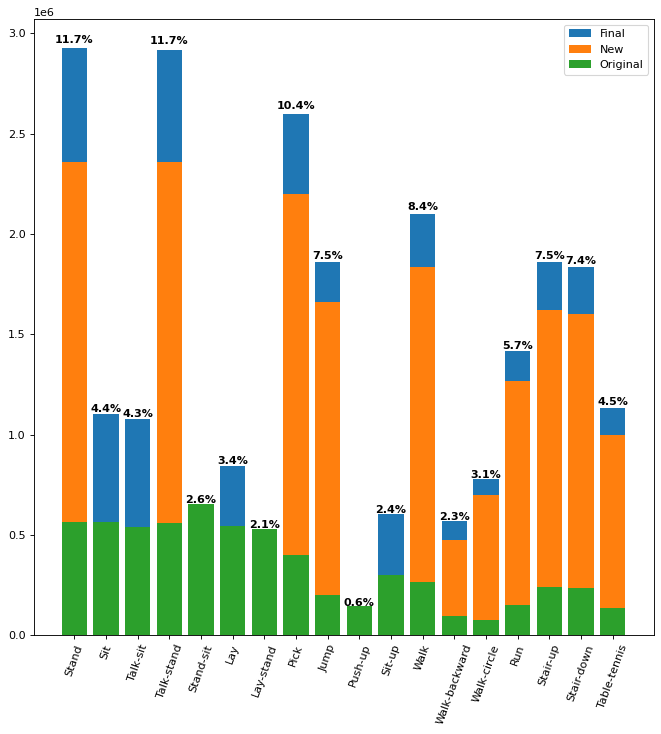

In [8]:
plt.figure(figsize=(10, 10), dpi=80)

total_counts = final_labels.shape[0] * final_labels.shape[1]
unique, final_counts = np.unique(final_labels, return_counts=True)
chart = plt.bar(CLASS_LABELS[unique], final_counts)
plt.xticks(rotation=70)

unique, counts = np.unique(new_labels, return_counts=True)
plt.bar(CLASS_LABELS[unique], counts)
plt.xticks(rotation=70)

unique, counts = np.unique(labels, return_counts=True)
plt.bar(CLASS_LABELS[unique], counts)
plt.xticks(rotation=70)

for i, p in enumerate(chart):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round((final_counts[i] * 100) / total_counts, 1))+'%',
             ha='center',
             weight='bold')

plt.legend(["Final", "New", "Original"])
plt.show()

In [11]:
np.savez_compressed("../datasets/new_dataset", signals=final_signals, labels=final_labels)